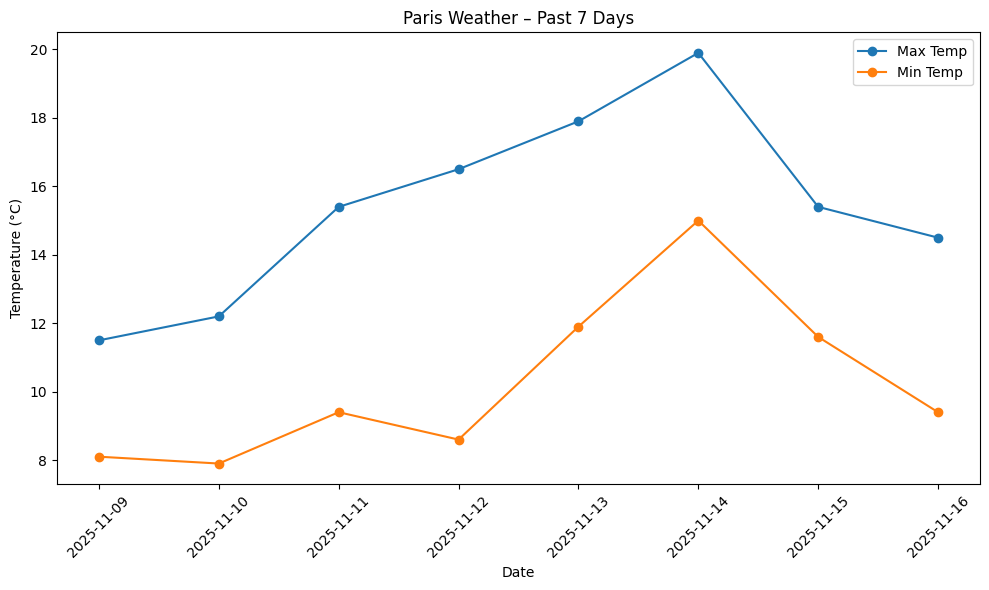

In [1]:
# Get 7 days weather data
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Calculate dates
today = datetime.now()
week_ago = today - timedelta(days=7)

# Format dates for API (YYYY-MM-DD)
start_date = week_ago.strftime("%Y-%m-%d")
end_date = today.strftime("%Y-%m-%d")

# Get Paris weather (daily min/max temperature)
url = (
    f"https://api.open-meteo.com/v1/forecast?"
    f"latitude=48.8566&longitude=2.3522"
    f"&start_date={start_date}&end_date={end_date}"
    f"&daily=temperature_2m_max,temperature_2m_min"
    f"&timezone=auto"
)

# Make request
response = requests.get(url)
data = response.json()


#Pandas------------------------------------------
# Extract daily section
daily_data = data['daily']

# Create DataFrame  
df = pd.DataFrame({
    "date": daily_data["time"],
    "max_temp": daily_data["temperature_2m_max"],
    "min_temp": daily_data["temperature_2m_min"]
})

# Convert date to datetime
df["date"] = pd.to_datetime(df["date"])

# print(df)

#Matplotlib-----------------------------------------------

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['max_temp'], marker='o', label="Max Temp")
plt.plot(df['date'], df['min_temp'], marker='o', label="Min Temp")

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Paris Weather – Past 7 Days')
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('weather_chart.png')
plt.show()